<a href="https://colab.research.google.com/github/TomasManuelObregon/Python/blob/Labo2/clase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as op 

## Amplitud recibida en funcion de la enviada

In [19]:
'''
Distancia entre el par: 2.58cm
'''

#Amplitud recibida en funcion de la amplitud generada
A_r_1 = [0.72, 1.38, 2.07, 2.71, 3.33, 3.98, 4.52, 5.05, 5.58, 6.00, 6.70, 7.10, 7.7, 8.2, 8.50, 8.9, 9.3, 9.6, 10.0, 10.3]
A_g_1 = [0.48, 0.96, 1.41, 1.88, 2.32, 2.86, 3.32, 3.72, 4.22, 4.72, 5.3, 5.85, 6.3, 6.8, 7.30, 7.70, 8.3, 8.6, 9.2, 9.8]

err_A_r_1 = [0.04, 0.02, 0.02, 0.02, 0.02, 0.04, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.1, 0.1, 0.05, 0.1, 0.1, 0.1, 0.1, 0.1]
err_A_g_1 = [0.01, 0.01, 0.01, 0.01, 0.04, 0.04, 0.08, 0.08, 0.04, 0.08, 0.05, 0.05, 0.05, 0.1, 0.05, 0.1, 0.1, 0.1, 0.1, 0.1]

# Con esta funcion hago los ajustes
def lin(x,m, b):
  y = m*x + b  
  return y

# Ajuste con todos los datos
popt, pcov = op.curve_fit(lin,A_g_1,A_r_1,sigma= err_A_r_1, absolute_sigma = True)
pend_todos   = popt[0]
ord_todos    = popt[1]

dom_todos = np.linspace(min(A_g_1), max(A_g_1),1000)
im_todos = lin(dom_todos, pend_todos, ord_todos)

# Ajuste hasta el dato 8
popt, pcov = op.curve_fit(lin,A_g_1[:7],A_r_1[:7],sigma= err_A_r_1[:7], absolute_sigma = True)
pend_8vo   = popt[0]
ord_8vo    = popt[1]

dom_8vo = np.linspace(min(A_g_1), max(A_g_1),1000)
im_8vo = lin(dom_8vo, pend_8vo, ord_8vo)



# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

'''
Distancia entre el par: 12.58cm
'''

#Amplitud recibida en funcion de la amplitud generada
A_r_2 = np.array([0.35, 0.70, 1.05, 1.37, 1.68, 1.96, 2.24, 2.50, 2.75, 3.02]) # AZUL
A_g_2 = np.array([1.95, 3.79, 5.70, 7.58, 9.56, 11.5, 13.2, 15.2, 17.00, 19.7]) #AMARILLA

A_r_2= A_r_2/2
A_g_2= A_g_2/2

err_A_r_2 = [0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.05, 0.04] # AZUL
err_A_g_2 = [0.01, 0.01, 0.02, 0.02, 0.04, 0.1, 0.01, 0.1, 0.01, 0.1] # AMARILLA

#ajuste lineal 
popt, pcov = op.curve_fit(lin,A_g_2,A_r_2,sigma= err_A_r_2, absolute_sigma = True)
pend_2   = popt[0]
ord_2    = popt[1]

dom_2 = np.linspace(min(A_g_2), max(A_g_2),1000)
im_2 = lin(dom_2, pend_2, ord_2)

### Graficos 

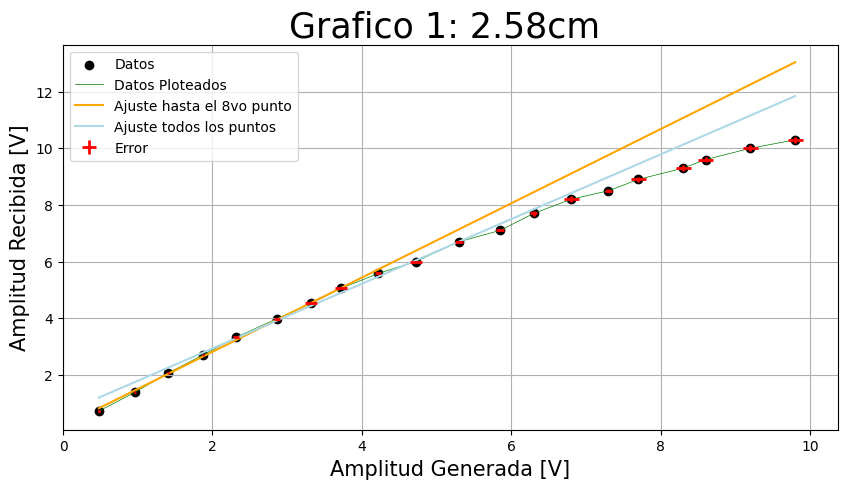

In [22]:
plt.figure(figsize=[10,5])
# Grafico 1 
plt.scatter(A_g_1, A_r_1, c='black', marker='o', label='Datos')
plt.plot(A_g_1, A_r_1, c='green', linewidth= 0.5, label='Datos Ploteados')

# Ajuste lineal hasta el octavo
plt.plot(dom_8vo, im_8vo, color= 'orange', label= 'Ajuste hasta el 8vo punto')

# Ajuste lineal todos
plt.plot(dom_todos, im_todos, color= 'lightblue', label= 'Ajuste todos los puntos')

#error
plt.errorbar(A_g_1, A_r_1, xerr = err_A_g_1, yerr= err_A_r_1, linewidth= 0, elinewidth= 2, c='red', label= 'Error')

plt.title('Grafico 1: 2.58cm ', fontsize= 25)
plt.xlabel('Amplitud Generada [V]', fontsize=15)
plt.ylabel('Amplitud Recibida [V]', fontsize=15)
plt.legend()
plt.grid()
plt.show()

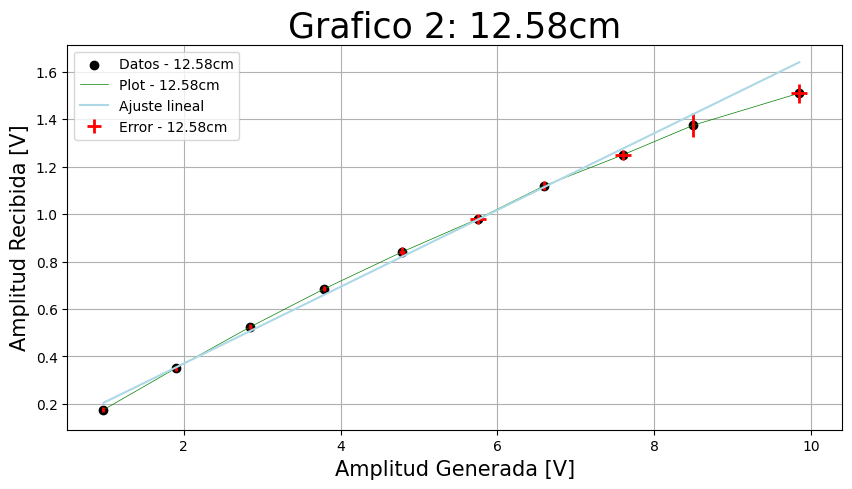

In [20]:
plt.figure(figsize=[10,5])
# Grafico 2
plt.scatter(A_g_2, A_r_2, c='black', marker='o', label='Datos - 12.58cm')
plt.plot(A_g_2, A_r_2, c='green', linewidth= 0.5, label='Plot - 12.58cm')
plt.errorbar(A_g_2, A_r_2, xerr = err_A_g_2, yerr= err_A_r_2, linewidth= 0, elinewidth= 2, c='red', label= 'Error - 12.58cm')

# Ajuste lineal 2
plt.plot(dom_2, im_2, color= 'lightblue', label= 'Ajuste lineal')

plt.title('Grafico 2: 12.58cm', fontsize= 25)
plt.xlabel('Amplitud Generada [V]', fontsize=15)
plt.ylabel('Amplitud Recibida [V]', fontsize=15)
plt.legend()
plt.grid()
plt.show()

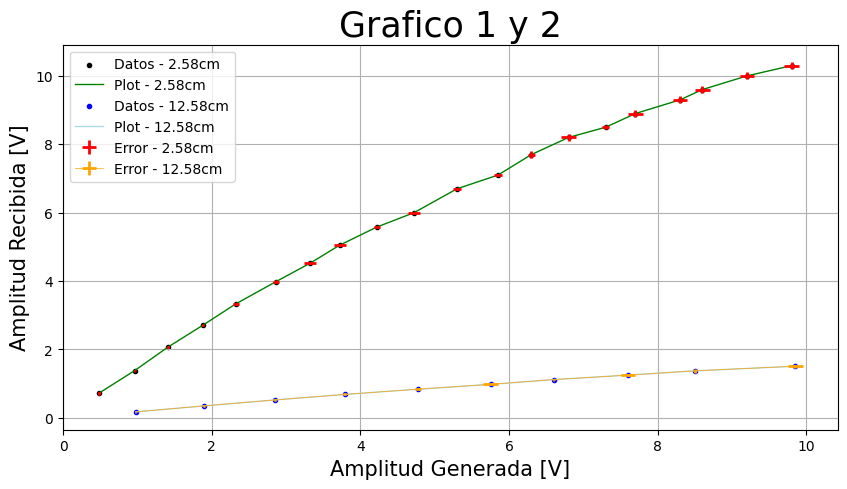

In [5]:
plt.figure(figsize=[10,5])
# Grafico 1
plt.scatter(A_g_1, A_r_1, c='black', marker='.', label='Datos - 2.58cm')
plt.plot(A_g_1, A_r_1, c='green', linewidth= 1, label='Plot - 2.58cm')
plt.errorbar(A_g_1, A_r_1, xerr = err_A_g_1, yerr= err_A_r_1, linewidth= 0, elinewidth= 2, c='red', label= 'Error - 2.58cm')

# Grafico 2
plt.scatter(A_g_2, A_r_2, c='blue', marker='.', label='Datos - 12.58cm')
plt.plot(A_g_2, A_r_2, c='lightblue', linewidth= 1, label='Plot - 12.58cm')
plt.errorbar(A_g_2, A_r_2, xerr = err_A_g_2, yerr= err_A_r_2, linewidth= 0.5, elinewidth= 2, c='orange', label= 'Error - 12.58cm')

plt.title('Grafico 1 y 2', fontsize= 25)
plt.xlabel('Amplitud Generada [V]', fontsize=15)
plt.ylabel('Amplitud Recibida [V]', fontsize=15)
plt.legend()
plt.grid()
plt.show()

## Campana de respuesta

La campana de respuesta de amplitud segun la frecuencia corresponde a:

<center>
$\LARGE L(x) = \frac{k\cdot\alpha}{\pi[(x-x_0)^2+\alpha^2]}$
</center>


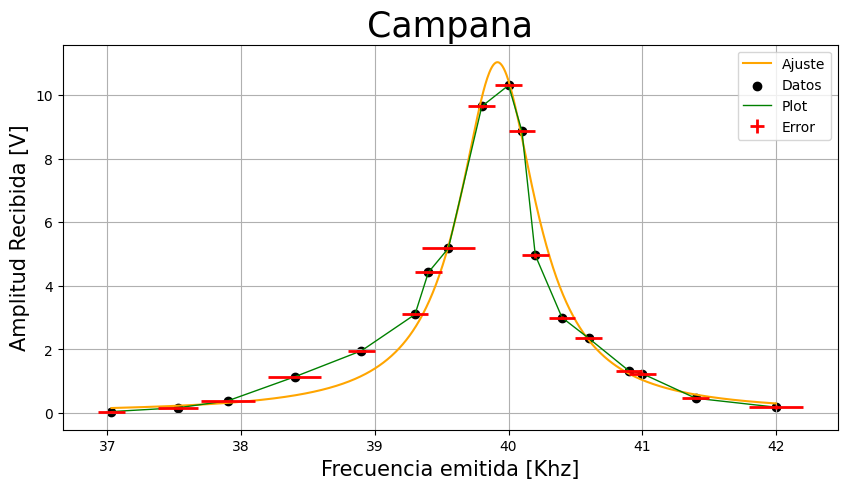

In [15]:
from matplotlib.offsetbox import AnchoredOffsetbox
datos_campana = np.loadtxt('datos_campana.csv', skiprows=1, delimiter=';')

fr_em=[]
err_fr_em=[]
amp_fr = []
err_amp_fr = []

for i in range(0,len(datos_campana)):
  fr_em.append(datos_campana[i][0])
  err_fr_em.append(datos_campana[i][1])
  amp_fr.append(datos_campana[i][2])
  err_amp_fr.append(datos_campana[i][3])    

def lorentz(x,a,k,x0):
  y=(a*k)/(np.pi *(((x-x0)**2)+ a**2))
  return y

# Ajuste
popt, pcov = op.curve_fit(lorentz,fr_em, amp_fr, sigma= err_amp_fr, absolute_sigma = True)
excentricidad   = popt[0]
ancho           = popt[1]
valor_medio     = popt[2]

dom_lorentz = np.linspace(min(fr_em),max(fr_em),1000)
im_lorentz  = lorentz(dom_lorentz, excentricidad, ancho, valor_medio)

# Grafico
plt.figure(figsize=[10,5])

plt.plot(dom_lorentz, im_lorentz, color= 'orange', label= 'Ajuste')
plt.scatter(fr_em, amp_fr, c='black', marker='o', label='Datos')
plt.plot(fr_em, amp_fr, c='green', linewidth= 1, label='Plot')
plt.errorbar(fr_em, amp_fr, xerr = err_fr_em, yerr= err_amp_fr, linewidth= 0, elinewidth= 2, c='red', label= 'Error')

plt.title('Campana', fontsize= 25)
plt.xlabel('Frecuencia emitida [Khz]', fontsize=15)
plt.ylabel('Amplitud Recibida [V]', fontsize=15)
plt.legend()
plt.grid()
plt.show()